&nbsp;

&nbsp;

&nbsp;


# Python performance profiling for data analysis
### Usage examples of cProfiler, line profiler and memory profiler to detect performance problems on data analysis algorithms.
---

&nbsp;

&nbsp;

&nbsp;

&nbsp;

**Jordi Deu-Pons**

@elbioc

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


![100 Python meetups & dojos](data/cake.jpg)

## 100 python meetups & dojos! Congratulations to everybody!

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


In [1]:
#
# Common imports
#

import random
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
#
# Load some meetup statistics
#

data = pd.read_csv('data/bcn_pymeetup_members.tsv', sep='\t', parse_dates=[0], index_col=0)
data.head()

,total,active
date,,
2009-08-13,135,28
2009-08-14,135,28
2009-08-15,136,30
2009-08-16,136,29
2009-08-17,136,27


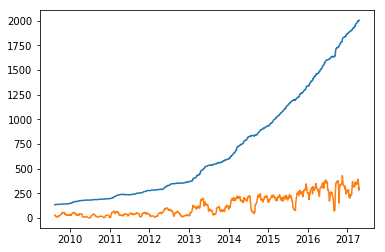

In [3]:
plt.plot(data)
plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


In [4]:
def pizzas_per_member(data, sampling=1000):
    
    pizzas = [15.0, 16.5, 18.0, 19.5, 21.0, 22.5, 24.0, 25.5, 27.0, 28.5, 30.0]
    
    slices_member = [0] * len(data)
    slices_active = [0] * len(data)
    
    data_total = data['total']
    data_active = data['active']
    
    for _ in range(sampling):
        
        for i, (total, active) in enumerate( zip( data_total, data_active ) ):
            
            pizzas_meetup = random.choice(pizzas)                          
            
            slices_member[i] += (1/sampling) * min(pizzas_meetup*8 / total, 8)
            slices_active[i] += (1/sampling) * min(pizzas_meetup*8 / active, 8)        
            
    return pd.DataFrame.from_dict({
                                        'date': data.index, 
                                        'active': slices_active, 
                                        'total': slices_member
                                    }).set_index(['date'])

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


In [5]:
%%time
df = pizzas_per_member(data)

CPU times: user 20 s, sys: 8 ms, total: 20 s
Wall time: 20 s


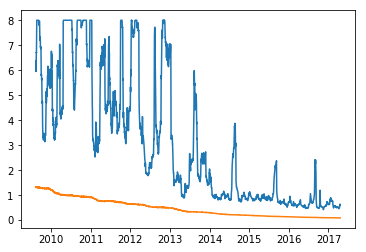

In [6]:
plt.plot(df)
plt.show()

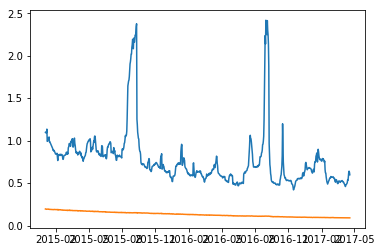

In [7]:
plt.plot(df[df.index > '2015'])
plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


In [8]:
#
# Import and load the memory and line profiler. 
# (no need to load/import the cProfiler)
#

import memory_profiler
import line_profiler
import snakeviz

%load_ext line_profiler
%load_ext memory_profiler
%load_ext snakeviz

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


In [9]:
%%prun -s cumulative

#
# cProfiler
#

pizzas_per_member(data, sampling=200)

#
# Command line usage
#
# python -m cProfile -s cumtime pizzas_per_member.py

In [10]:
%%snakeviz

pizzas_per_member(data, sampling=200)

 
*** Profile stats marshalled to file '/tmp/tmp82f2f5rp'. 


In [15]:

#
# Line profiler
#

%lprun -f pizzas_per_member pizzas_per_member(data, sampling=200)


In [16]:
def pizzas_per_member(data, sampling=1000):
    
    pizzas = [15.0, 16.5, 18.0, 19.5, 21.0, 22.5, 24.0, 25.5, 27.0, 28.5, 30.0]
    
    slices_member = [0] * len(data)
    slices_active = [0] * len(data)
    
    data_total = data['total'].tolist()
    data_active = data['active'].tolist()
    
    for _ in range(sampling):
        
        pizzas_meetup = random.choices(pizzas, k=len(data_total))
        
        for i, (total, active) in enumerate( zip( data_total, data_active ) ):
            
            a = (1/sampling)
            d = pizzas_meetup[i]*8 / active
            e = pizzas_meetup[i]*8 / total
            b = min(e, 8)
            c = min(d, 8)
            
            slices_member[i] += a * e 
            slices_active[i] += a * c
            
    return pd.DataFrame.from_dict({
                                        'date': data.index, 
                                        'active': slices_active, 
                                        'total': slices_member
                                    }).set_index(['date'])

In [17]:
%%time
df = pizzas_per_member(data)

CPU times: user 3.37 s, sys: 4 ms, total: 3.37 s
Wall time: 3.37 s


&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


In [18]:
%%timeit
pizzas_per_member(data)

1 loop, best of 3: 3.2 s per loop


In [19]:
%%memit
pizzas_per_member(data, sampling=200)

peak memory: 93.27 MiB, increment: 0.00 MiB


In [22]:
%%time
%mprun -f pizzas_per_member pizzas_per_member(data, sampling=2)


CPU times: user 2.44 s, sys: 632 ms, total: 3.07 s
Wall time: 3.07 s


In [23]:
from pizzastats import pizzas_per_member

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


# Other profiling tools

- Yappi *(support Multithread/CPU time profiling)*
- PyCharm *(professional, simple yappi or cProfile integration)*
- PyCharm + PyVmMonitor *(attach profiler to a running program)*
- ...

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;
